### W207 Final Project - Forest Coverage Classification

#### Team members: Emily, Mohan, Stefania

The project and data is from https://www.kaggle.com/c/forest-cover-type-prediction/overview

We chose to use the K-Nearest Neighbors Classifier for the baseline.

### Introduction

For our final project we set out to create a model that could predict the forest cover type based on a dataset of cartographic variables. The datasets and full project description can be found on Kaggle (https://www.kaggle.com/c/forest-cover-type-prediction/overview). In order to find the best model, we followed these steps:
1. Download and clean up data
2. Create a baseline model to compare future iterations against
3. Perform exploratory data analysis on key variables
4. Pre-process data
5. Feature engineering
6. Test various models



In [53]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 



### Download and separate data

In [67]:
# Read the data

df = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# Rename columns
df.columns = ["Id", "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",
    "Soil_Type1",  "Soil_Type2",  "Soil_Type3",  "Soil_Type4",  "Soil_Type5",  "Soil_Type6",
    "Soil_Type7",  "Soil_Type8",  "Soil_Type9",  "Soil_Type10", "Soil_Type11", "Soil_Type12",
    "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17",
    "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22",
    "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27",
    "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32",
    "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37",
    "Soil_Type38", "Soil_Type39", "Soil_Type40", "Cover_Type"]


In [68]:
# Seperating features (X) and labels (y)
from sklearn.model_selection import train_test_split

df = df.drop(["Id"], axis = 1)
test_data = test_data.drop(["Id"], axis = 1)

X, y = df.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

train_data, dev_data, train_data_label, dev_data_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_data_labels shape: ',train_data_label.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_data_labels shape: ',dev_data_label.shape)

train_data shape:  (12096, 54)
train_data_labels shape:  (12096,)
dev_data shape:  (3024, 54)
dev_data_labels shape:  (3024,)


In [69]:
dev_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3551,2311,102,25,525,17,1392,252,199,59,947,...,0,0,0,0,0,0,0,0,0,0
5928,2315,315,18,134,28,1500,170,223,192,660,...,0,0,0,0,0,0,0,0,0,0
13057,2276,91,16,0,0,1072,243,212,93,1201,...,0,0,0,0,0,0,0,0,0,0
2815,2797,174,23,272,91,600,226,245,138,577,...,0,0,0,0,0,0,0,0,0,0
12192,2038,15,3,0,0,700,217,233,154,691,...,0,0,0,0,0,0,0,0,0,0


### Baseline

For our baseline, we decided to use a simple KNN model. We iterated through a few values of K neighbors and found that the F1 value of the model dropped as K increased. 

k =  1 F1 of baseline model = 0.8374

k =  2 F1 of baseline model = 0.819

k =  4 F1 of baseline model = 0.8044

k =  6 F1 of baseline model = 0.7966

k =  8 F1 of baseline model = 0.78

k =  10 F1 of baseline model = 0.7728

k =  12 F1 of baseline model = 0.7571

k =  14 F1 of baseline model = 0.748

k =  16 F1 of baseline model = 0.7411

k =  18 F1 of baseline model = 0.7313

k =  20 F1 of baseline model = 0.7292



Text(0.5, 1.0, 'K value vs F1 Score')

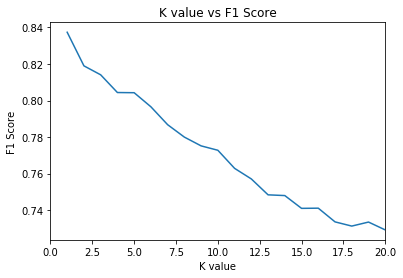

In [70]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data, train_data_label)
    y_dev_pred = knn_model.predict(dev_data)
    knn_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "F1 of baseline model = " + str(knn_f1))
        print("")
        
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("F1 Score")
plt.title("K value vs F1 Score")

We can see that the F1 scores decline as K increases. We will use the baseline value of k = 1. The f1 score is .8374.

### EDA

There are twelve distinct features available to us:

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal distance to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical distance to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal distance to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade distance at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal distance to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target is **Cover_Type** that designates forest cover type. The 7 cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


/Users/emilyrail/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/emilyrail/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


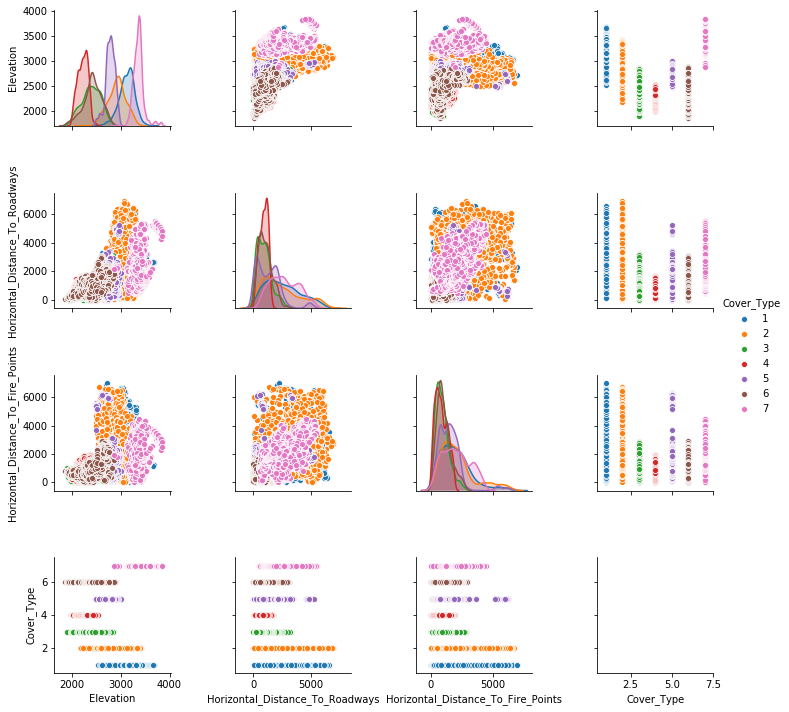

In [72]:
ex = df[["Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]

sns.pairplot(ex, hue = "Cover_Type")

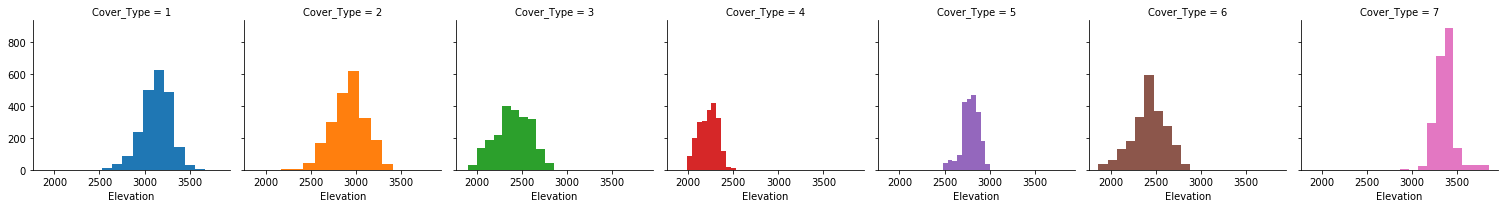

In [73]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Elevation");

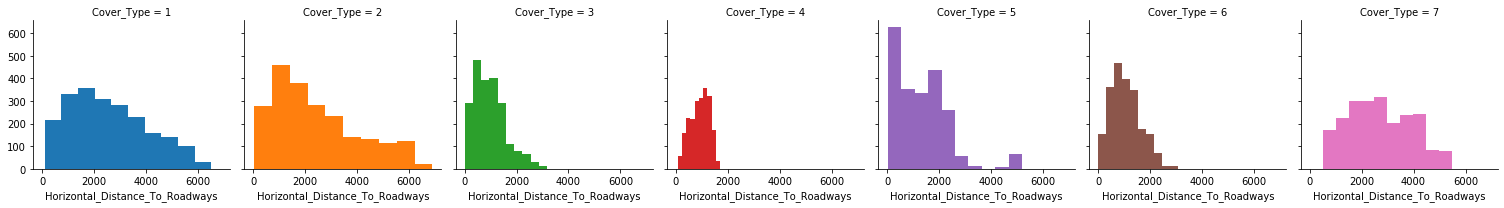

In [74]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Horizontal_Distance_To_Roadways");

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabelplt'

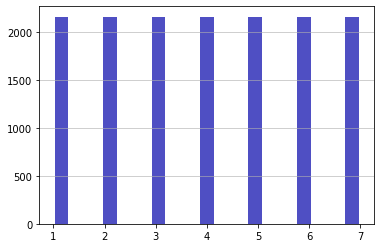

In [75]:
# Distribution of cover type
# Note - Need help on changing the xtick labels - it could look better
# https://realpython.com/python-histograms/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html


coversType = df['Cover_Type']
coversType.describe().T

n, bins, patches = plt.hist(x=coversType, color='#0504aa', bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabelplt.xticks(np.arange(8), ('','Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'), rotation=90)
plt.show()
('Cover Types')
plt.ylabel('Frequency')
plt.title('Frequency of Cover Types in Training Data')


### Soil type distribution

Soil type is represented as a binary feature in the data set There are 40 different features for each soil type.

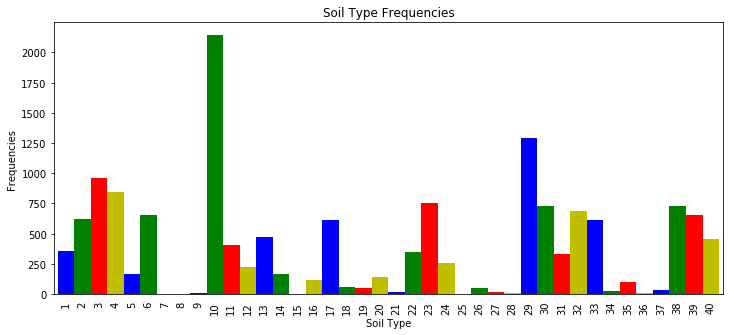

In [76]:
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']
soil_df.columns = range(1,41)
soil_series = soil_df.sum()
colors = ['b', 'g', 'r', 'y']

ax  = soil_series.plot(kind='bar', title = 'Soil Type Frequencies', width=1,figsize=(12, 5), color=colors)
ax.set_xlabel('Soil Type')
ax.set_ylabel('Frequencies')
ax.xaxis.set_ticks_position('none') 
plt.show()

## Data Cleaning

Let us remove ID since this has no significance in predicting cover type. Similarly, we remove soil types 7 and 15 as these have no values represented in data.

In [77]:
# Cleaning data by removing Id, Soil_Type7 and Soil_Type15

#train_data = train_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
#dev_data = dev_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
#test_data = test_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)


print('train_data shape: ',train_data.shape)
print('dev_data shape: ',dev_data.shape)
print('test_data shape: ',test_data.shape)


train_data shape:  (12096, 54)
dev_data shape:  (3024, 54)
test_data shape:  (565892, 54)


### Pre-processing Data

We used the Scikit-learn `Pipeline` class that applies a list of transformations to the data. We applied SimpleImputer, which replaces missing and `NAN` values with the `Median`, and a `StandardScaler` step, which subtracts the mean from each of the features and scales to unit variance. 

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline


##TODO: need to fix this to apply only to non-categorical and non-binary columns
def median_processor(df):
    pipeline1 = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
    df1 = pipeline1.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

In [79]:
median_processor(train_data)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.459435,-0.048570,1.240066,0.710974,2.272350,0.158238,0.953689,0.350988,-0.848744,-0.609228,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
1,0.284791,1.299527,-0.885929,-0.651024,-1.009344,-0.036874,-0.548954,0.789428,1.001114,-0.049528,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
2,0.425942,1.253983,-1.240262,-0.050983,-0.489472,2.538151,-0.287625,0.877116,0.848772,0.205616,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
3,0.184311,-0.112332,0.177069,-0.508157,-0.440733,0.405531,0.953689,0.657896,-0.457009,-0.300180,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
4,-0.456850,1.636551,-0.295375,-0.936758,-0.635686,0.217225,-0.842949,0.044080,0.783483,-0.890425,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,-1.016669,0.343107,1.121955,-0.651024,0.241599,-0.050487,-0.222292,1.359401,0.631142,-0.540051,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12092,-1.468830,0.689240,1.121955,-0.627213,0.014155,-0.449786,-1.430940,1.447089,1.654004,-1.017997,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12093,1.533618,0.170040,-0.767818,3.720704,1.638756,0.907680,0.431031,1.184024,0.348223,0.186750,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,4.480309,-0.214487,-0.177881
12094,0.966622,-1.114296,-0.531596,-0.365290,-0.765654,1.032461,0.169701,-0.218985,-0.108801,1.522663,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881


Normalize data

In [80]:
#normalize all values (subtract mean, divide by standard deviation) for non-categorical features


def normalize_processor(df):
    column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"])], remainder = "passthrough") 

    dfnorm = column_trans.fit_transform(df)
    dfnorm2 = pd.DataFrame(dfnorm, columns = df.columns)
    return dfnorm2


In [81]:

## why do we have a normalize processor and the standard scalar in the median processor?


### Feature Engineering 

We attempt to reduce complexity by creating features by combining existing ones to  optimize our model’s performance. In order to make the best possible prediction we need to make the most of the features we are given. This involves combining two or more significant features, or categorizing different ones to make them more digestable for the model. 

1.  **Euclidian distance to Hydration**
In the Random Forest model we observed that horizontal and vertical distance were both very important features. We believe that combining these features into one would influence the model. Incorporating this new feature we can drop the other 2 features. We use Euclidian distance to combine the features. This is the diagonal distance of the two features.
<br/><br/>
$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

<br/><br/>

2.  **Soil Type** – We observed in the Random Forest model that soil types were individually not very important features. So we decided to aggregate these soil types to create three new features based on their textures: `soil_stony`, `soil_rubbly`, and `soil_other`
<br/><br/>
3. **Hillshade Mean** - We are given the Hillshade index at 9:00 am, noon, and 3:00 pm. Given this information, and the fact that our prior model gave importance to these features, we added another feature `Hillshade_mean`, which represents the average of these three indices.
<br/><br/>
$$ HillshadeMean = \frac{Hillshade9am + Hillshade3pm + HillshadeNoon}{3} $$


<br/><br/>

The data cleaning, feature selection, preprocessing steps, and the feature engineering are all performed in the function `feat_eng`. This will be run on both the training and testing data, to make sure the data are in sync.

In [82]:
def feat_eng(df):
    # Adding Hillshade_Mean Feature
    df['Hillshade_Mean'] =  (df['Hillshade_9am'] + df['Hillshade_Noon']  + df['Hillshade_3pm']) / 3
    
    # Adding Euclidian Distance
    
    #df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(df['Horizontal_Distance_To_Hydrology'] **2 + df['Vertical_Distance_To_Hydrology'] **2 )
    df['Euclidean_Dist_To_Hydrology'] =  np.sqrt((df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2))
    
    # Categorizing Soil Types by texture
    stony_col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type22', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
    rubbly_col = ['Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13']
    other_col = ['Soil_Type8', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type35']
    df['soil_stony'] = df[stony_col].sum(axis=1)
    df['soil_rubbly'] = df[rubbly_col].sum(axis=1)
    df['soil_other'] = df[other_col].sum(axis=1)    

    # ---------- Removing below features ---------
   # df = df.drop(['Id'], axis=1) # Removing 'Id' column
  #  df = df.drop(['Soil_Type7','Soil_Type15'], axis=1)

    return df

In [83]:
pre_processed_data = feat_eng(df)

X2, y = pre_processed_data.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

X_preproc = median_processor(X2)
print(X_preproc.shape)

test_data_preproc = feat_eng(test_data)
test_data_preproc = median_processor(test_data_preproc)

(15120, 59)


In [84]:
X_preproc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hillshade_Mean,Euclidean_Dist_To_Hydrology,soil_stony,soil_rubbly,soil_other
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.666456,0.102333,0.922319,-0.702272,-0.38547
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.763782,-0.110745,0.922319,-0.702272,-0.38547
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.783248,0.184798,0.922319,-0.702272,-0.38547
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.608060,0.154476,0.922319,-0.702272,-0.38547
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,0.724852,-0.384926,0.922319,-0.702272,-0.38547


### Decision Trees for Feature Selection

#### Start with one tree

In [85]:
# create a baseline random forest using all the features 


RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_data_label) # Fitting the train data to the classifier 
#predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
print("F1 score of baseline Random Forest = " + str(RF_f1))

F1 score of baseline Random Forest = 0.8494611080756219


In [86]:
# Important features of the random forest

importances = RF_baseline.feature_importances_
indices = np.argsort(importances)[::-1] 
print("Random Forest top impportant features")
importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])

for i in range(len(indices)):
    importance = np.around(importances[indices[i]],decimals=4)
    feature = train_data.columns[indices[i]]
    rank = i + 1
    importances_df.loc[i] = [rank, feature, importance]


# List the feature importances of the forest

importances_df

Random Forest top impportant features


,Rank,Feature,Importance
0,1,Elevation,0.2289
1,2,Horizontal_Distance_To_Roadways,0.0879
2,3,Horizontal_Distance_To_Fire_Points,0.0719
3,4,Horizontal_Distance_To_Hydrology,0.0596
4,5,Vertical_Distance_To_Hydrology,0.0520
5,6,Wilderness_Area4,0.0514
6,7,Hillshade_9am,0.0495
7,8,Aspect,0.0476
8,9,Hillshade_3pm,0.0446
9,10,Hillshade_Noon,0.0431


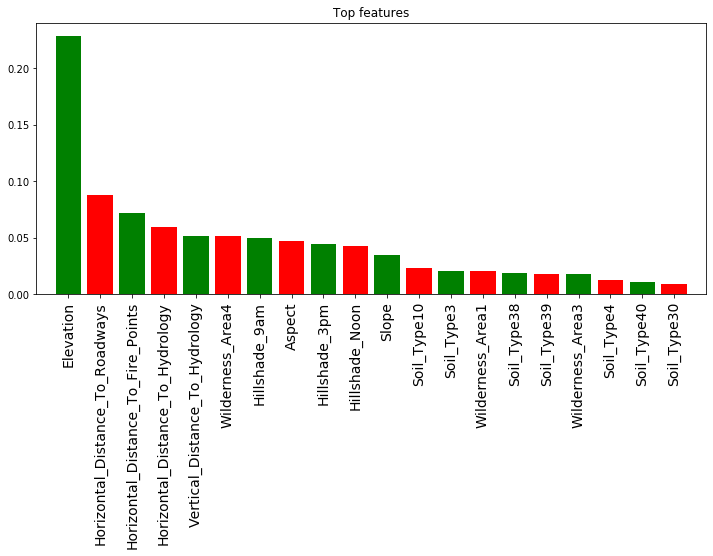

In [87]:
# Plot the feature importances of the forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

indices=indices[:20] 
plt.figure(figsize = (12,5)) 
plt.title("Top features") 
plt.bar(range(20), importances[indices], color="gr", align="center") 
plt.xticks(range(20), train_data.columns[indices], fontsize=14, rotation=90) 
plt.xlim([-1, 20]) 
plt.show()


Processor that keeps only most important features

In [88]:

#train_data[]

In [89]:
# returns a dataframe with subset of n most important features based on RF model
def rf_feature_selector(df, n_features):
    df1 = df[importances_df['Feature'][:n_features]]
    return df1

The Random Forest baseline model performs well on the training data, with a 0.85 F1 score.

Elevation is exteremly significant, followed by Horizontal distance to Roadways, Fire points and Hydrology. 

## L1 Regularization for Feature Selection

In [90]:

 
lg = LogisticRegression(C=.1, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
lg.fit(train_data, train_data_label)
lg_pred= lg.predict(dev_data)
accuracy = metrics.f1_score(dev_data_label, lg_pred, average="weighted")
print("F1:", accuracy)
print("")
vert_sum_coefs = lg.coef_.sum(axis = 0)
#print(vert_sum_coefs)
print("Features with coefficient < 0.05:")
low_coef_list = []
for i in range(len(vert_sum_coefs)):
    if abs(vert_sum_coefs[i]) < 0.05:
        print(train_data.columns[i],"|",vert_sum_coefs[i])
        low_coef_list.append(train_data.columns[i])
        
features_coefs = list(zip(train_data.columns,vert_sum_coefs))
features_coefs_df = pd.DataFrame(features_coefs, columns=['feature','L1_coef'])
print(features_coefs_df.sort_values(by='L1_coef'))
            
#ordered_list = np.argsort(vert_sum_coefs)
#print(ordered_list)

F1: 0.6512715220649608

Features with coefficient < 0.05:
Elevation | 0.0015780040870693977
Aspect | 0.002298959173607249
Horizontal_Distance_To_Hydrology | -0.00568446616034508
Vertical_Distance_To_Hydrology | 0.007510968965998749
Horizontal_Distance_To_Roadways | -0.00046019368535984246
Hillshade_Noon | 0.02599627669254225
Horizontal_Distance_To_Fire_Points | 9.690462960333884e-06
Soil_Type7 | 0.0
Soil_Type8 | 0.0
Soil_Type9 | 0.0
Soil_Type15 | 0.0
Soil_Type21 | 0.0
Soil_Type25 | 0.0
Soil_Type27 | 0.0
Soil_Type28 | 0.0
Soil_Type34 | 0.0
Soil_Type36 | 0.0
                               feature   L1_coef
13                    Wilderness_Area4 -6.126050
10                    Wilderness_Area1 -4.141844
52                         Soil_Type39 -1.973722
11                    Wilderness_Area2 -1.883952
51                         Soil_Type38 -1.852515
53                         Soil_Type40 -1.429976
2                                Slope -0.213902
8                        Hillshade_3pm -0.067

In [91]:
# returns df that drops columns that have coefficients below 0.5 after L1 regularization in logistic regression

def l1reg_feature_selector(df):
    df1 = df.drop(low_coef_list, axis = 1)
    return df1



## Pre-processed Data Sets

In [92]:
train_data_median_trans = median_processor(train_data)
train_data_norm = normalize_processor(train_data)
train_data_rf_selector = rf_feature_selector(train_data,10)
train_data_l1reg_selector = l1reg_feature_selector(train_data)
train_data_feat_eng = feat_eng(train_data)
train_feat_norm = feat_eng(normalize_processor(train_data))


dev_data_median_trans = median_processor(dev_data)
dev_data_norm = normalize_processor(dev_data)
dev_data_rf_selector = rf_feature_selector(dev_data,10)
dev_data_l1reg_selector = l1reg_feature_selector(dev_data)
dev_data_feat_eng = feat_eng(dev_data)
dev_feat_norm = feat_eng(normalize_processor(dev_data))
train_datasets = [train_data_median_trans, train_data_norm, train_data_rf_selector, train_data_l1reg_selector, train_data_feat_eng, train_feat_norm]

dev_datasets = [dev_data_median_trans, dev_data_norm, dev_data_rf_selector, dev_data_l1reg_selector, dev_data_feat_eng, dev_feat_norm]

transformation_names = ["Median Pre-processor", "Normalize", "Feat Selector RF", "Feat Selector L1 Reg", "Feat Eng", "Norm Feat Eng"]


/Users/emilyrail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/emilyrail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/emilyrail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

## Random Forest With Processed Data

In [93]:
RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
for ds in range(len(train_datasets)):
    RF_baseline.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier 
    #predict = RF_baseline.predict(test_data)
    RF_pred = RF_baseline.predict(dev_datasets[ds])
    RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
    print("Transformation:", transformation_names[ds])
    print("F1 score of baseline Random Forest = " + str(RF_f1))

Transformation: Median Pre-processor
F1 score of baseline Random Forest = 0.8456827271233459
Transformation: Normalize
F1 score of baseline Random Forest = 0.8457855881093915
Transformation: Feat Selector RF
F1 score of baseline Random Forest = 0.8306101097313484
Transformation: Feat Selector L1 Reg
F1 score of baseline Random Forest = 0.6290736252497326
Transformation: Feat Eng
F1 score of baseline Random Forest = 0.84337465457324
Transformation: Norm Feat Eng
F1 score of baseline Random Forest = 0.8406116287586464


### SVM - Mohan

Support Vector Machines are a fast supervised learning model that perform non-linear classification. T

In [94]:
import time
index = np.array([0, 1, 2,3,4])
model_performance_df = pd.DataFrame(columns = ['Model Name', 'Train Time(s)', 'Prediction Time(s)', 'F1 Score'], index=index)

In [95]:

def process_model(clf, clf_name, idx):
    start_train = time.time()
    clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))
    
    # Make prediction on dev data
    start_test = time.time()
    pred = clf.predict(dev_data2)
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))
    
    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
    print('F1 Score for ' + clf_name + " = " + str(dev_f1))
    model_performance_df.iloc[idx] = [clf_name, train_time, test_time, dev_f1]
    

In [96]:
# NOTE - this step takes time - implement only once

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
clf = GridSearchCV(SVC(), params)
clf.fit(train_data2, train_labels2)
print(clf.best_params_) 

NameError: name 'train_data2' is not defined

In [ ]:
# Pipeline for fitting model, making predictions, and saving performance metrics
# Using the values for the params from the grid search above

svm_clf =  SVC(kernel="rbf", gamma=.05, C=100)

start_train = time.time()
svm_clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
end_train = time.time()
train_time = str(round(end_train - start_train, 2))
    
# Make prediction on dev data
start_test = time.time()
pred = svm_clf.predict(dev_data2)
end_test = time.time()
test_time = str(round(end_test - start_test, 2))
    
# Store metrics
dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
print("F1 Score for SVM = " + str(dev_f1))
model_performance_df.iloc[0] = ['SVM', train_time, test_time, dev_f1]

### Gradient Descent

### Ensemble

## Decision Tree

In [97]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(train_data, train_data_label)

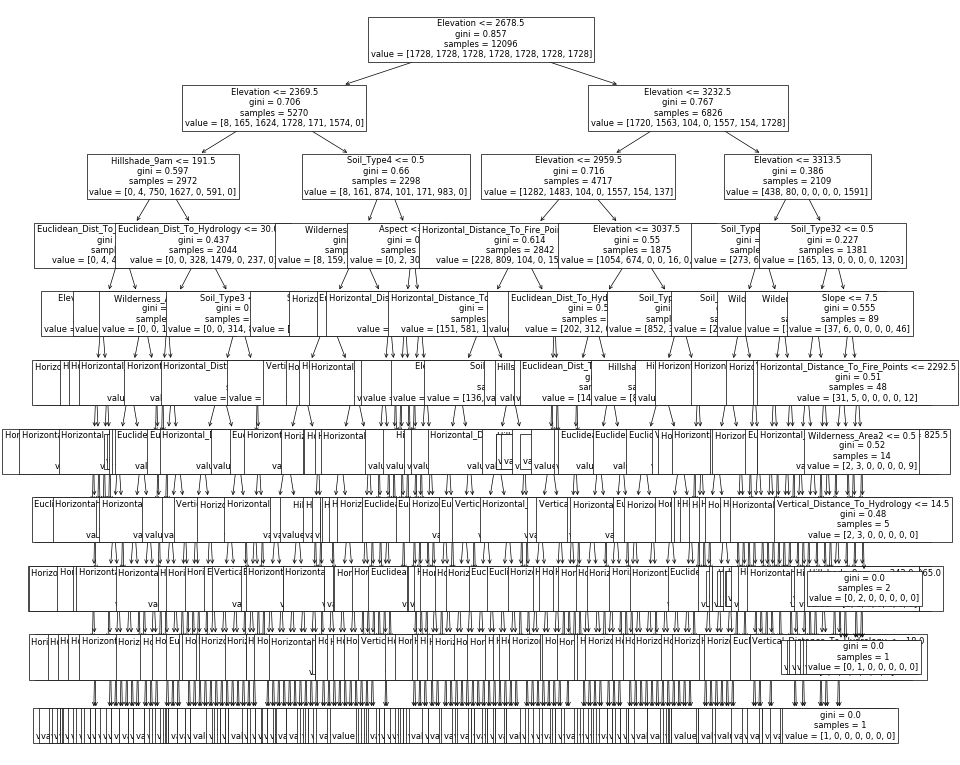

In [98]:
%matplotlib inline
plt.figure(figsize = (20, 20), dpi = 50)
tree.plot_tree(clf, fontsize =12, feature_names=train_data.columns,rotate = True) 

plt.show()

In [99]:
tree_pred= clf.predict(dev_data)
accuracy = metrics.f1_score(dev_data_label, tree_pred, average="weighted")
print("Accuracy", accuracy)

Accuracy 0.7304670405419101


In [100]:
import graphviz 
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

%matplotlib inline
plt.figure(figsize = (20, 20))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=train_data.columns,  
                     # class_names=iris.target_names,  
                      filled=True, rounded=False,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


ModuleNotFoundError: No module named 'graphviz'

### Re-run KNN

Transformation: Median Pre-processor 0.7996
Transformation: Normalize 0.7963
Transformation: Feat Selector RF 0.8371
Transformation: Feat Selector L1 Reg 0.3974
Transformation: Feat Eng 0.8353
Transformation: Norm Feat Eng 0.7881


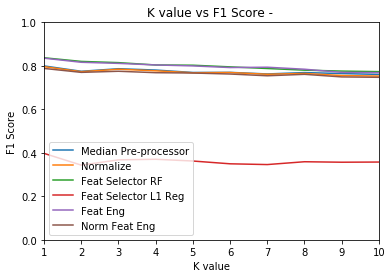

In [108]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm


for ds in range(len(train_datasets)):
    f1_2 = []
    for i in range(1,11):
        knn_model_2 = KNeighborsClassifier(n_neighbors = i)
        knn_model_2.fit(train_datasets[ds], train_data_label)
        y_dev_pred = knn_model_2.predict(dev_datasets[ds])
        knn_f1_2 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
        f1_2.append(knn_f1_2)
        #print("Transformation:", transformation_names[ds])
        #print("F1 score of baseline knn = " + str(knn_f1_2))
    print("Transformation:", transformation_names[ds], max(f1_2))
    plt.plot(range(1,11), f1_2)
    plt.xlim(1,10)
    plt.ylim(0,1)
    plt.xlabel("K value")
    plt.ylabel("F1 Score")
    plt.title("K value vs F1 Score - ")#, transformation_names[ds])
    plt.legend(transformation_names)
    


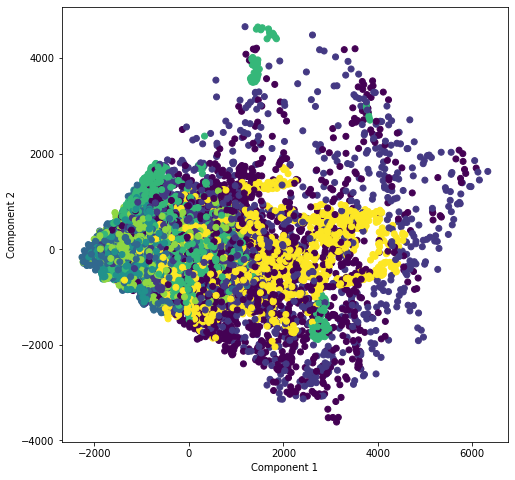

In [112]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components = 2)
principal_components = pca2d.fit_transform(train_data)
principalDf = pd.DataFrame(data = principal_components
             , columns = ['component1', 'component2'])

fig = plt.figure(figsize=(8, 8))
plt.scatter(principalDf.component1, principalDf.component2, c = train_data_label)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()



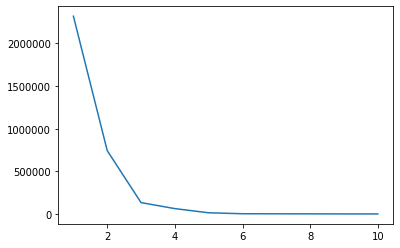

In [116]:
k = range(1,11)
var = []

for k in k:
    pca = PCA(n_components = k)
    pca = pca.fit(train_data)
    ex_var = pca.explained_variance_
    #print("k : ", k, "\n ex_var: ", ex_var)
    #principalDf = pd.DataFrame(data = principal_components
    #        , columns = ['component1', 'component2'])
    
plt.plot(range(1,11), ex_var)

In [126]:
from sklearn.cluster import KMeans

pca3d = PCA(n_components = 3)
principal_components = pca3d.fit_transform(train_data)
kmeans = KMeans(n_clusters = 7).fit(principal_components)
dev_components = pca3d.fit_transform(dev_data)
y_dev_pred = kmeans.predict(dev_components)
kmeans_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
print(kmeans_f1)



0.0606


/Users/emilyrail/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/emilyrail/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
